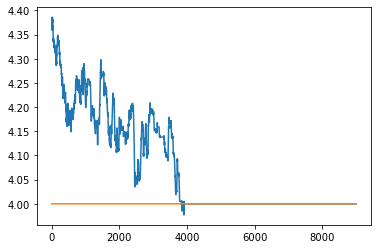

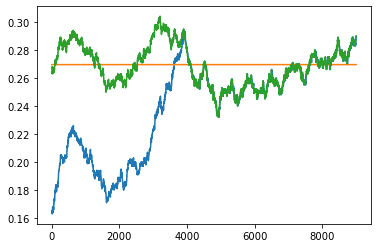

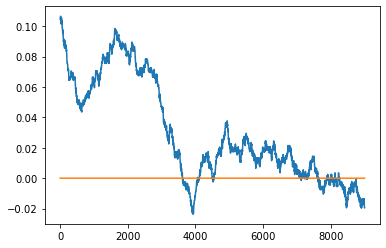

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd

def moving_average(a, n=1000, axis=None) :
    ret = np.cumsum(a, dtype=float, axis=axis)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

with Path('results.npz') as f:
    npz = np.load(f)
    choices = npz['selections']
    rewards = npz['rewards']

dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
means = dataset.mean(axis=0)
avg_reward = moving_average(rewards)
avg_choice = moving_average(choices)
optimal_reward = means.max()
optimal_choice = means.values.argmax()

moving_optimal = moving_average(dataset.values, axis=0)

plt.plot(avg_choice)
plt.plot(optimal_choice * np.ones_like(avg_choice))
plt.show()

plt.plot(avg_reward)
plt.plot(optimal_reward * np.ones_like(avg_reward))
plt.plot(moving_optimal.max(axis=1))
plt.show()

regret = moving_average(optimal_reward - rewards)
plt.plot(regret)
plt.plot(np.zeros_like(regret))
plt.show()
# plt.plot(np.stack([moving_average(rewards), optimal_reward]))
# plt.show()